In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def step_function0(x):
    y = x > 0
    return y.astype(np.int)

def step_function1(x):
    return np.array(x>0,dtype=int)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def softmax0(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [4]:
a=np.array([1010,1000,990])
y1 = softmax(a)
y0 = softmax0(a)
print(y1)
print(y0)

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
[nan nan nan]


C:\Users\G15\AppData\Local\Temp\ipykernel_15040\2229234711.py:15: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
C:\Users\G15\AppData\Local\Temp\ipykernel_15040\2229234711.py:17: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


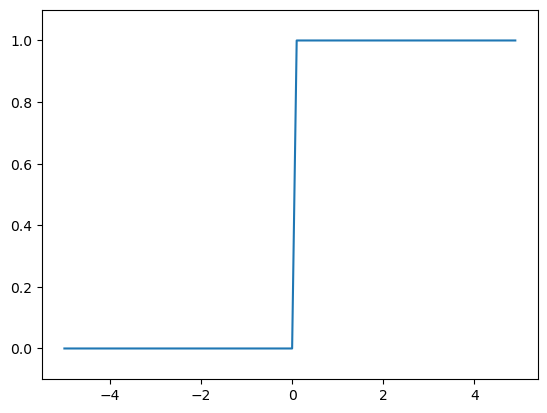

In [3]:
x = np.arange(-5.0,5.0,0.1)
y = step_function1(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

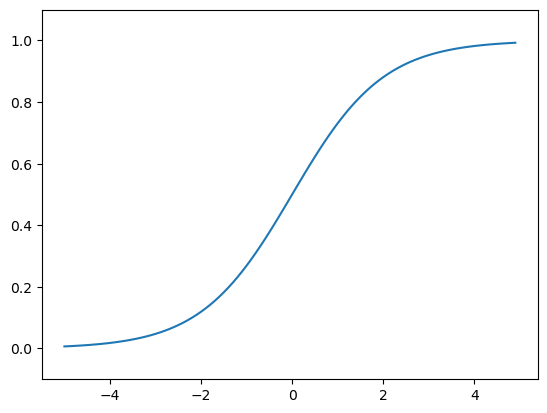

In [4]:
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [5]:
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
(x_train,t_train),(x_test,t_test) = load_mnist(flatten=True,normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [9]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train,t_train),(x_test,t_test) = load_mnist(flatten=True,normalize=False)
img = x_train[59999]
label = t_train[59999]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

8
(784,)
(28, 28)


In [15]:
import sys, os
sys.path.append(os.pardir) 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [ ]:
x, t = get_data()
#print(x,t)
network = init_network()
#print(network)
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) 
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [7 2 1 ... 4 5 6]
10000
Accuracy:0.9352


In [9]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis=1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
